# kNN and Naive Bayes

## 1. Load data

In [96]:
import pandas as pd

In [97]:
raw_data = pd.read_csv('raw_data.csv')
raw_data.head(10)

,content,category
0,Võ sĩ MMA bị knock-out lạ kỳ vì... 'đụng đầu' ...,Thể thao
1,"Thi đấu từ máy bay ở độ cao 6.096m, ngôi sao 6...",Thể thao
2,Ấn Độ yêu cầu mạng xã hội gỡ cụm từ 'biến thể ...,Công nghệ
3,Tay đua 19 tuổi Jason Dupasquier qua đời sau t...,Thể thao
4,Cảnh sát Ấn Độ 'cảnh báo' Công ty Twitter TTO ...,Công nghệ
5,Sủng Cỏ thiên đường hoang sơ nơi cửa vịnh Đà N...,Du lịch
6,"Giận liên đoàn, CĐV Indonesia không vào sân cổ...",Thể thao
7,Google bỏ cookie theo dõi người dùng là để 'là...,Công nghệ
8,"Võ sĩ hạng nặng đánh nhau trên sàn đấu, khán g...",Thể thao
9,Bánh trứng thời nghèo khó Dan Bing bỗng len lỏ...,Du lịch


In [98]:
raw_data.groupby('category').size()

category
Công nghệ    1579
Du lịch      2535
Thể thao     3058
dtype: int64

## 2. Split data into train - test sets

In [99]:
X = raw_data['content'].values
y = raw_data['category'].values

Since categories (label) are categorical variables, we need to convert categories into numbers.

In [100]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
X_train.shape

(5737,)

In [103]:
y_train.shape

(5737,)

In [104]:
X_test.shape

(1435,)

In [105]:
y_test.shape

(1435,)

## 3. Apply kNN

In [106]:
# import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
# vectorize X train data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
vocab = vectorizer.get_feature_names()

In [108]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train_tfidf = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))

In [109]:
y_train_tfidf

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [110]:
# import kNN
from sklearn.neighbors import KNeighborsClassifier

In [111]:
kNN = KNeighborsClassifier(n_neighbors=5)
# kNN.fit(X_train_tfidf, y_train_tfidf)
kNN.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [112]:
# vectorize X test data
X_test_tfidf = vectorizer.transform(X_test).toarray()

In [113]:
# predict
y_pred = kNN.predict(X_test_tfidf)

In [114]:
# import accuracy and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [115]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 85.92 %.


In [116]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[265,  58,  12],
       [ 55, 437,  21],
       [ 19,  37, 531]])

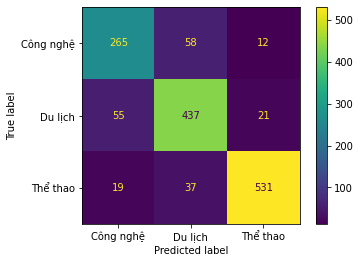

In [117]:
plot_confusion_matrix(kNN, X_test_tfidf, y_test, display_labels=le.classes_)  
plt.show()

In [118]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_pred), average=None, labels=le.classes_)

(array([0.78171091, 0.82142857, 0.94148936]),
 array([0.79104478, 0.85185185, 0.90459966]),
 array([0.78635015, 0.83636364, 0.92267593]),
 array([335, 513, 587]))

## 4. Apply Multinomial Naive Bayes without balancing data

In [119]:
# import packages
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [120]:
imbalanced_pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())
imbalanced_pipeline.fit(X_train, y_train)
y_imbalanced_pred = imbalanced_pipeline.predict(X_test)

In [147]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_imbalanced_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 85.23 %.


In [122]:
# confusion matrix
cm = confusion_matrix(y_test, y_imbalanced_pred)
cm

array([[197, 132,   6],
       [  5, 491,  17],
       [  2,  50, 535]])

<ipython-input-123-fda9dfbfe44c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+labels)
<ipython-input-123-fda9dfbfe44c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+labels)


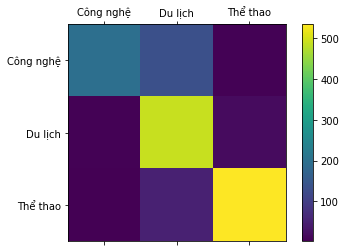

In [123]:
def plot_cm(cm, labels):
    figure = plt.figure()
    axes = figure.add_subplot(111)
    
    # using the matshow() function 
    caxes = axes.matshow(cm)
    figure.colorbar(caxes)
    
    axes.set_xticklabels(['']+labels)
    axes.set_yticklabels(['']+labels)
    
    plt.show()

plot_cm(cm, list(le.classes_))

In [124]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_imbalanced_pred), average=None, labels=le.classes_)

(array([0.96568627, 0.72956909, 0.95878136]),
 array([0.5880597 , 0.95711501, 0.91141397]),
 array([0.7309833 , 0.82799325, 0.93449782]),
 array([335, 513, 587]))

## 5. Apply Multinomial Naive Bayes with balancing data

In [125]:
# import packages
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced

In [126]:
balanced_pipeline = make_pipeline_imb(TfidfVectorizer(), RandomUnderSampler(), MultinomialNB())
balanced_pipeline.fit(X_train, y_train)
y_balanced_pred = balanced_pipeline.predict(X_test)

In [127]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_balanced_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 87.46 %.


In [128]:
# confusion matrix
cm = confusion_matrix(y_test, y_balanced_pred)
cm

array([[285,  46,   4],
       [ 58, 446,   9],
       [ 20,  43, 524]])

<ipython-input-123-fda9dfbfe44c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+labels)
<ipython-input-123-fda9dfbfe44c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+labels)


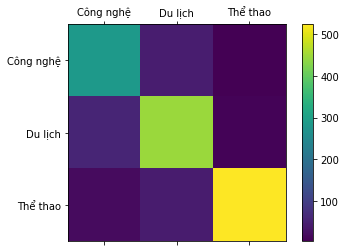

In [129]:
plot_cm(cm, list(le.classes_))

In [130]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_balanced_pred), average=None, labels=le.classes_)

(array([0.78512397, 0.83364486, 0.97579143]),
 array([0.85074627, 0.86939571, 0.89267462]),
 array([0.81661891, 0.85114504, 0.93238434]),
 array([335, 513, 587]))

## 6. Apply SVM

In [131]:
# import packages
from sklearn.svm import SVC 

### 6.1. Default kernel (rbf)

In [132]:
clf = SVC()
clf_rbf = clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

In [133]:
print('Accuraycy: ',clf_rbf.score(X_test_tfidf, y_test))

Accuraycy:  0.8878048780487805


In [134]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[258,  72,   5],
       [ 21, 480,  12],
       [  6,  45, 536]])

<ipython-input-123-fda9dfbfe44c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+labels)
<ipython-input-123-fda9dfbfe44c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+labels)


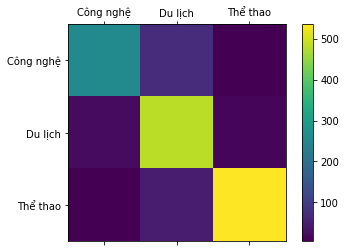

In [135]:
plot_cm(cm, list(le.classes_))

In [136]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_pred), average=None, labels=le.classes_)

(array([0.90526316, 0.8040201 , 0.96925859]),
 array([0.77014925, 0.93567251, 0.91311755]),
 array([0.83225806, 0.86486486, 0.94035088]),
 array([335, 513, 587]))

### 6.2. Linear kernel

In [137]:
clf = SVC(kernel='linear')
clf_linear = clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

In [138]:
print('Accuraycy: ',clf_linear.score(X_test_tfidf, y_test))

Accuraycy:  0.8829268292682927


In [139]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[260,  69,   6],
       [ 28, 473,  12],
       [  9,  44, 534]])

<ipython-input-123-fda9dfbfe44c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+labels)
<ipython-input-123-fda9dfbfe44c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+labels)


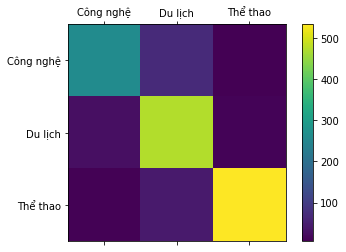

In [140]:
plot_cm(cm, list(le.classes_))

In [141]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_pred), average=None, labels=le.classes_)

(array([0.87542088, 0.80716724, 0.9673913 ]),
 array([0.7761194 , 0.92202729, 0.90971039]),
 array([0.82278481, 0.86078253, 0.93766462]),
 array([335, 513, 587]))

### 6.3. Poly kernel

In [142]:
clf = SVC(kernel='poly')
clf_poly = clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

In [143]:
print('Accuraycy: ',clf_poly.score(X_test_tfidf, y_test))

Accuraycy:  0.8271777003484321


In [144]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[160, 163,  12],
       [  9, 489,  15],
       [  3,  46, 538]])

<ipython-input-123-fda9dfbfe44c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+labels)
<ipython-input-123-fda9dfbfe44c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+labels)


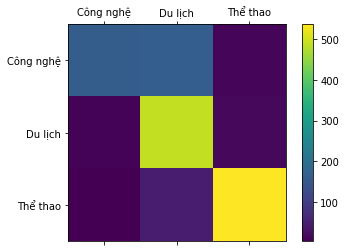

In [145]:
plot_cm(cm, list(le.classes_))

In [146]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_pred), average=None, labels=le.classes_)

(array([0.93023256, 0.70057307, 0.95221239]),
 array([0.47761194, 0.95321637, 0.9165247 ]),
 array([0.63116371, 0.80759703, 0.93402778]),
 array([335, 513, 587]))

## 7. Neural network

In [148]:
import tensorflow as tf

In [170]:
# hyperparameters
num_classes = 3 # Thể thao, du lịch, công nghệ
learning_rate = 0.001
epochs = 100
batch_size = 128

### 7.1. Two layers, first layer has 128 neurals

In [171]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=X_train_tfidf.shape[1], activation='relu'),
	tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [172]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [173]:
history = model.fit(X_train_tfidf, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
45/45 [==============================] - 1s 10ms/step - loss: 0.8612 - accuracy: 0.7622
Epoch 2/100
45/45 [==============================] - 0s 10ms/step - loss: 0.4308 - accuracy: 0.9017
Epoch 3/100
45/45 [==============================] - 0s 11ms/step - loss: 0.2789 - accuracy: 0.9266
Epoch 4/100
45/45 [==============================] - 0s 10ms/step - loss: 0.2132 - accuracy: 0.9397
Epoch 5/100
45/45 [==============================] - 0s 10ms/step - loss: 0.1688 - accuracy: 0.9550
Epoch 6/100
45/45 [==============================] - 0s 10ms/step - loss: 0.1337 - accuracy: 0.9662
Epoch 7/100
45/45 [==============================] - 0s 10ms/step - loss: 0.1069 - accuracy: 0.9754
Epoch 8/100
45/45 [==============================] - 0s 10ms/step - loss: 0.0852 - accuracy: 0.9833
Epoch 9/100
45/45 [==============================] - 0s 10ms/step - loss: 0.0684 - accuracy: 0.9880
Epoch 10/100
45/45 [==============================] - 0s 10ms/step - loss: 0.0551 - accuracy: 0.9923

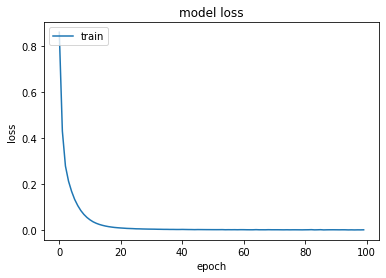

In [174]:
# summarize history for loss
plt.plot()
plt.plot(range(0, epochs), history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

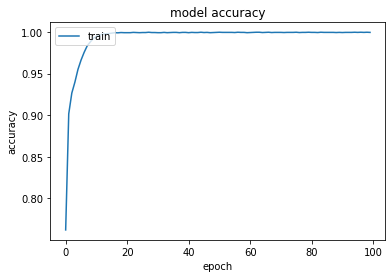

In [175]:
# summarize history for accuracy
plt.plot(range(0, epochs), history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [176]:
y_pred_prob = model.predict(X_test_tfidf)
y_pred = []
for item in y_pred_prob:
    m = max(item)
    for idx, val in enumerate(item):
        if val == m:
            y_pred.append(idx)
            break

In [177]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 84.88 %.


In [178]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[244,  83,   8],
       [ 40, 445,  28],
       [  9,  49, 529]])

<ipython-input-123-fda9dfbfe44c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+labels)
<ipython-input-123-fda9dfbfe44c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+labels)


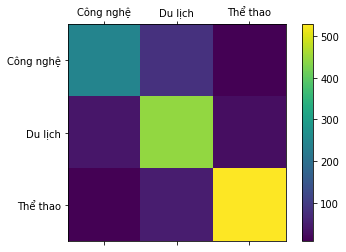

In [179]:
plot_cm(cm, list(le.classes_))

In [180]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_pred), average=None, labels=le.classes_)

(array([0.83276451, 0.7712305 , 0.93628319]),
 array([0.72835821, 0.86744639, 0.9011925 ]),
 array([0.77707006, 0.81651376, 0.91840278]),
 array([335, 513, 587]))

### 7.2. Two layers, first layer has 1024 neurals

In [162]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,input_dim=X_train_tfidf.shape[1], activation='relu'),
	tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model2.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history2 = model2.fit(X_train_tfidf, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
45/45 [==============================] - 3s 50ms/step - loss: 0.6215 - accuracy: 0.7980
Epoch 2/100
45/45 [==============================] - 2s 50ms/step - loss: 0.2386 - accuracy: 0.9261
Epoch 3/100
45/45 [==============================] - 2s 52ms/step - loss: 0.1376 - accuracy: 0.9603
Epoch 4/100
45/45 [==============================] - 2s 50ms/step - loss: 0.0790 - accuracy: 0.9831
Epoch 5/100
45/45 [==============================] - 2s 53ms/step - loss: 0.0447 - accuracy: 0.9939
Epoch 6/100
45/45 [==============================] - 2s 51ms/step - loss: 0.0253 - accuracy: 0.9976
Epoch 7/100
45/45 [==============================] - 2s 53ms/step - loss: 0.0157 - accuracy: 0.9984
Epoch 8/100
45/45 [==============================] - 2s 52ms/step - loss: 0.0113 - accuracy: 0.9990
Epoch 9/100
45/45 [==============================] - 2s 51ms/step - loss: 0.0086 - accuracy: 0.9991
Epoch 10/100
45/45 [==============================] - 2s 52ms/step - loss: 0.0076 - accuracy: 0.9988

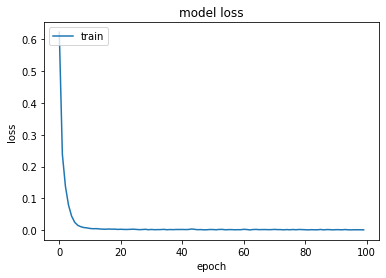

In [163]:
# summarize history for loss
plt.plot()
plt.plot(range(0, epochs), history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

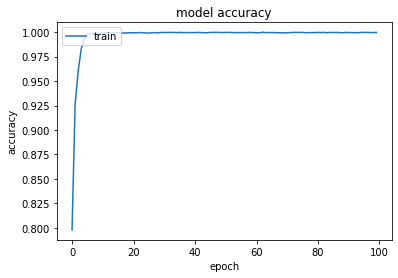

In [164]:
# summarize history for accuracy
plt.plot(range(0, epochs), history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [165]:
y_pred_prob = model2.predict(X_test_tfidf)
y_pred = []
for item in y_pred_prob:
    m = max(item)
    for idx, val in enumerate(item):
        if val == m:
            y_pred.append(idx)
            break

In [166]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 84.67 %.


In [167]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[236,  91,   8],
       [ 33, 457,  23],
       [ 11,  54, 522]])

<ipython-input-123-fda9dfbfe44c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+labels)
<ipython-input-123-fda9dfbfe44c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+labels)


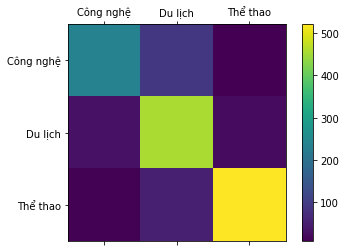

In [168]:
plot_cm(cm, list(le.classes_))

In [169]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_pred), average=None, labels=le.classes_)

(array([0.84285714, 0.75913621, 0.94394213]),
 array([0.70447761, 0.89083821, 0.88926746]),
 array([0.76747967, 0.81973094, 0.91578947]),
 array([335, 513, 587]))

### 7.3. Many layers

In [202]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(200,input_dim=X_train_tfidf.shape[1], activation='relu'),
    tf.keras.layers.Dense(150,input_dim=X_train_tfidf.shape[1], activation='relu'),
    tf.keras.layers.Dense(100,input_dim=X_train_tfidf.shape[1], activation='relu'),
    tf.keras.layers.Dense(50,input_dim=X_train_tfidf.shape[1], activation='relu'),
	tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model3.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history3 = model3.fit(X_train_tfidf, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
45/45 [==============================] - 1s 16ms/step - loss: 0.7409 - accuracy: 0.6247
Epoch 2/100
45/45 [==============================] - 1s 15ms/step - loss: 0.2678 - accuracy: 0.9189
Epoch 3/100
45/45 [==============================] - 1s 15ms/step - loss: 0.1144 - accuracy: 0.9653
Epoch 4/100
45/45 [==============================] - 1s 15ms/step - loss: 0.0417 - accuracy: 0.9906
Epoch 5/100
45/45 [==============================] - 1s 15ms/step - loss: 0.0156 - accuracy: 0.9969
Epoch 6/100
45/45 [==============================] - 1s 15ms/step - loss: 0.0097 - accuracy: 0.9984
Epoch 7/100
45/45 [==============================] - 1s 15ms/step - loss: 0.0070 - accuracy: 0.9986
Epoch 8/100
45/45 [==============================] - 1s 15ms/step - loss: 0.0061 - accuracy: 0.9986
Epoch 9/100
45/45 [==============================] - 1s 15ms/step - loss: 0.0042 - accuracy: 0.9991
Epoch 10/100
45/45 [==============================] - 1s 15ms/step - loss: 0.0051 - accuracy: 0.9990

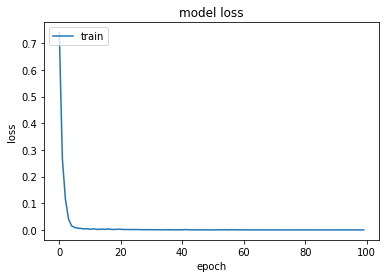

In [203]:
# summarize history for loss
plt.plot()
plt.plot(range(0, epochs), history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

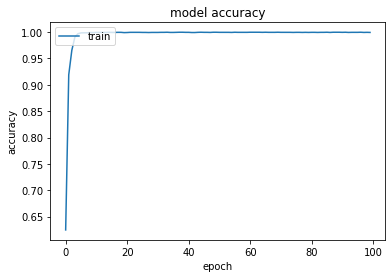

In [204]:
# summarize history for accuracy
plt.plot(range(0, epochs), history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [205]:
y_pred_prob = model3.predict(X_test_tfidf)
y_pred = []
for item in y_pred_prob:
    m = max(item)
    for idx, val in enumerate(item):
        if val == m:
            y_pred.append(idx)
            break

In [206]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 85.44 %.


In [207]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[259,  67,   9],
       [ 45, 442,  26],
       [ 13,  49, 525]])

<ipython-input-123-fda9dfbfe44c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+labels)
<ipython-input-123-fda9dfbfe44c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+labels)


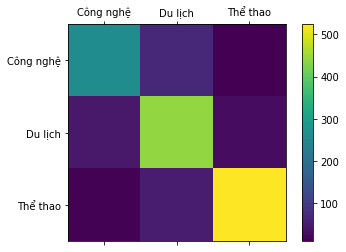

In [208]:
plot_cm(cm, list(le.classes_))

In [209]:
# precision, recal and fbeta_score
precision_recall_fscore_support(le.inverse_transform(y_test), le.inverse_transform(y_pred), average=None, labels=le.classes_)

(array([0.8170347, 0.7921147, 0.9375   ]),
 array([0.77313433, 0.86159844, 0.89437819]),
 array([0.79447853, 0.82539683, 0.91543156]),
 array([335, 513, 587]))